# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [123]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [124]:


# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 5

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")



Processing Record 1 of Set 5 | rikitea
Processing Record 2 of Set 5 | albany
Processing Record 3 of Set 5 | lasa
Processing Record 4 of Set 5 | gorey
Processing Record 5 of Set 5 | shenjiamen
Processing Record 6 of Set 5 | hobart
Processing Record 7 of Set 5 | barrow
City not found. Skipping...
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | impfondo
Processing Record 11 of Set 5 | atuona
Processing Record 12 of Set 5 | tuatapere
Processing Record 13 of Set 5 | capoterra
Processing Record 14 of Set 5 | mataura
Processing Record 15 of Set 5 | cabedelo
Processing Record 16 of Set 5 | raudeberg
Processing Record 17 of Set 5 | spearfish
Processing Record 18 of Set 5 | ribas do rio pardo
Processing Record 19 of Set 5 | narsaq
Processing Record 20 of Set 5 | nikolskoye
Processing Record 21 of Set 5 | buchanan
Processing Record 22 of Set 5 | erenhot
Processing Record 23 of Set 5 | puerto del rosario
Processing Record 24 of Set 5 | 

City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 8 | sampit
Processing Record 41 of Set 8 | lokoja
Processing Record 42 of Set 8 | halifax
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | netrakona
Processing Record 45 of Set 8 | cabo san lucas
Processing Record 46 of Set 8 | lucapa
Processing Record 47 of Set 8 | hasaki
Processing Record 48 of Set 8 | kaitangata
Processing Record 49 of Set 8 | santa vitoria do palmar
City not found. Skipping...
Processing Record 1 of Set 9 | pilna
Processing Record 2 of Set 9 | clearlake
Processing Record 3 of Set 9 | hami
Processing Record 4 of Set 9 | coahuayana
Processing Record 5 of Set 9 | dharchula
Processing Record 6 of Set 9 | dehloran
Processing Record 7 of Set 9 | boca do acre
Processing Record 8 of Set 9 | cidreira
Processing Record 9 of Set 9 | aksarka
Processing Record 10 of Set 9 | slyudyanka
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Se

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

## Convert Raw Data to DataFrame
* Save as csv

In [125]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_dict

weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,24,PF,1603245031,75,-23.12,-134.97,74.08,9.31
1,albany,100,US,1603245057,81,42.60,-73.97,57.00,4.03
2,lasa,5,IT,1603245223,100,46.62,10.70,48.99,5.82
3,gorey,57,IE,1603245223,92,52.67,-6.29,46.00,7.27
4,shenjiamen,100,CN,1603245223,78,29.96,122.30,68.43,13.02
5,hobart,40,AU,1603245213,51,-42.88,147.33,68.00,8.05
6,barrow,90,US,1603245223,86,71.29,-156.79,26.60,13.87
7,katsuura,7,JP,1603245101,52,35.13,140.30,69.01,19.39
8,kodiak,1,US,1603245223,42,57.79,-152.41,48.20,16.11
9,impfondo,52,CG,1603245223,98,1.64,18.07,69.67,1.77


In [126]:

# output data to csv
weather_dataframe.to_csv(r'weather_dataframe.csv')

In [127]:
weather_dataframe.count()

City          334
Cloudiness    334
Country       334
Date          334
Humidity      334
Lat           334
Lng           334
Max Temp      334
Wind Speed    334
dtype: int64

In [128]:

weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,24,PF,1603245031,75,-23.12,-134.97,74.08,9.31
1,albany,100,US,1603245057,81,42.60,-73.97,57.00,4.03
2,lasa,5,IT,1603245223,100,46.62,10.70,48.99,5.82
3,gorey,57,IE,1603245223,92,52.67,-6.29,46.00,7.27
4,shenjiamen,100,CN,1603245223,78,29.96,122.30,68.43,13.02


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

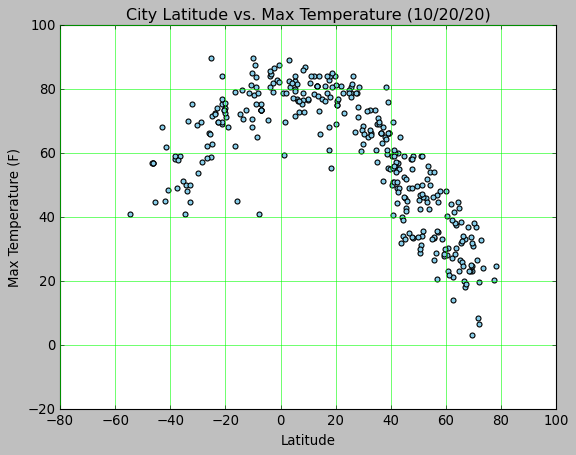

In [129]:


plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lime")
plt.savefig("Fig1.png")
plt.show()



### Latitude vs. Humidity Plot

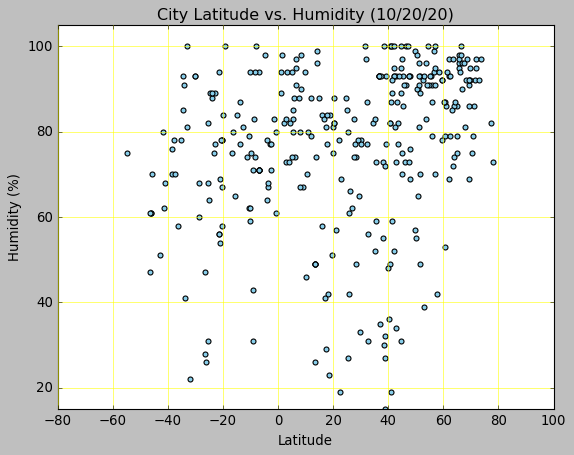

In [130]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="yellow")
plt.savefig("Fig2.png")
plt.show()

### Latitude vs. Cloudiness Plot

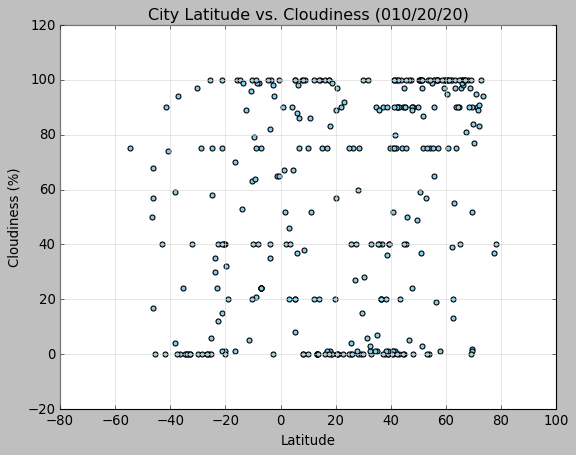

In [131]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (010/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.savefig("Fig3.png")
plt.show()

### Latitude vs. Wind Speed Plot

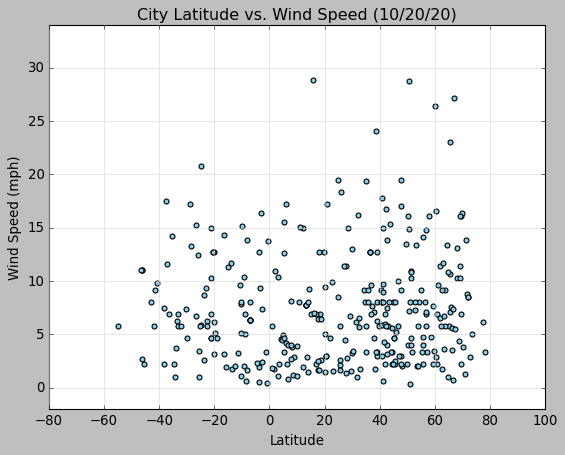

In [132]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.savefig("Fig4.png")

plt.show()



## Linear Regression

### Write linear regression plot function (optional)

In [133]:
L=0
Northern = weather_dataframe.query(f"Lat >= {L}")
Southern = weather_dataframe.query(f"Lat <= {L}")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [134]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("fig.png")
    plt.show()



The r-value is: -0.8961266133630054


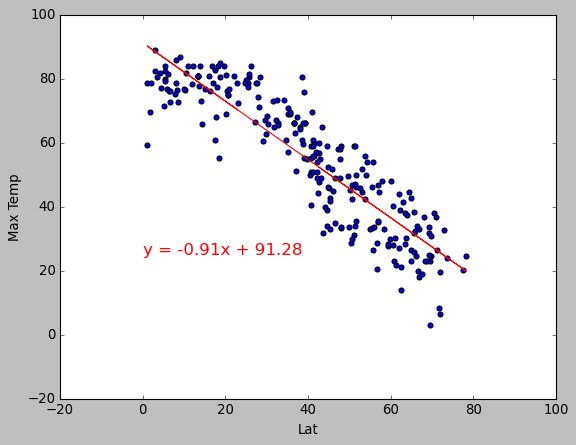

In [135]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,5)

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7209014847338061


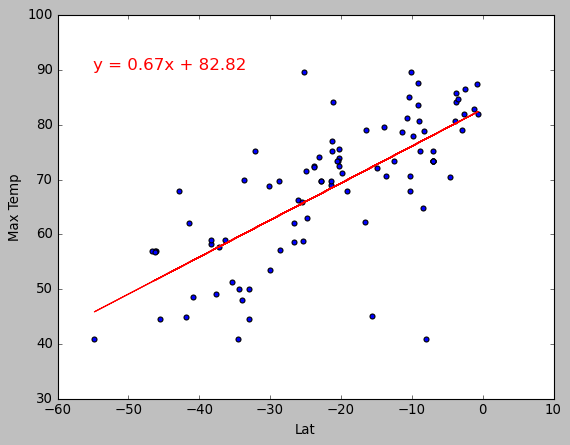

In [136]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,6)

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.25187788956517554


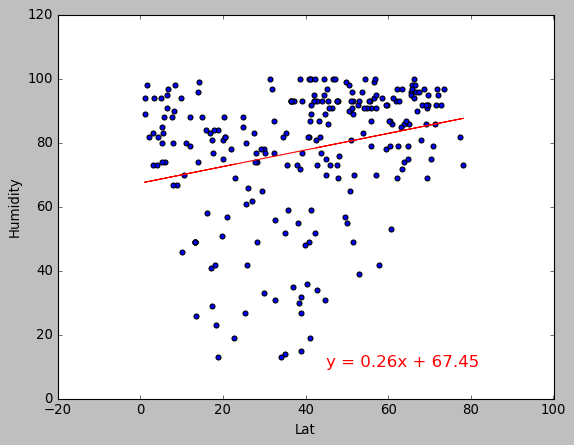

In [137]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,7)

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1607831807286692


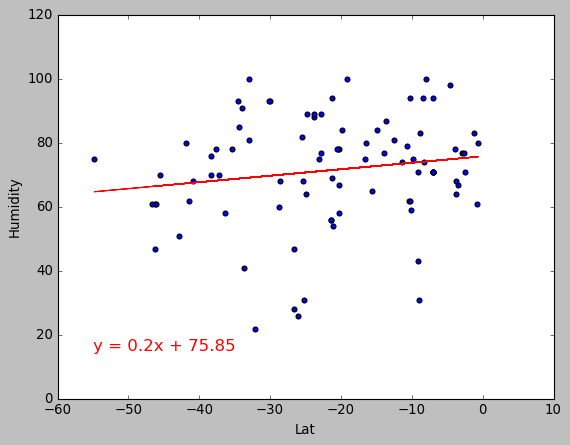

In [138]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,8)

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.30483180556752437


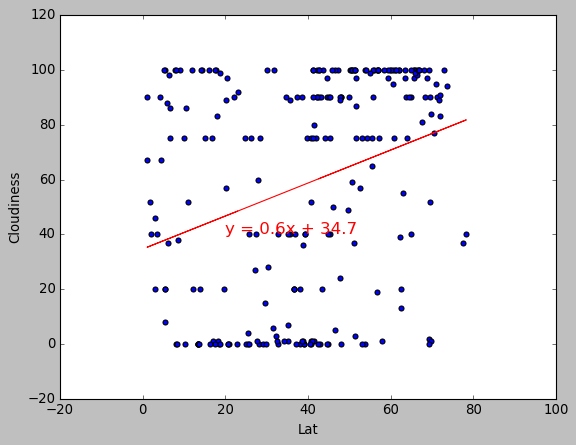

In [139]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,9)

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3134225034460628


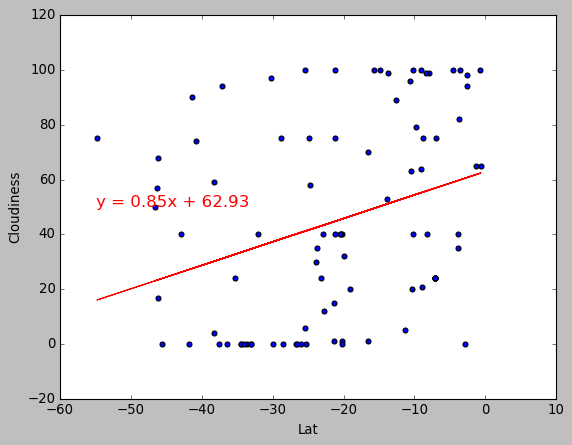

In [140]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,10)

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12896255570433737


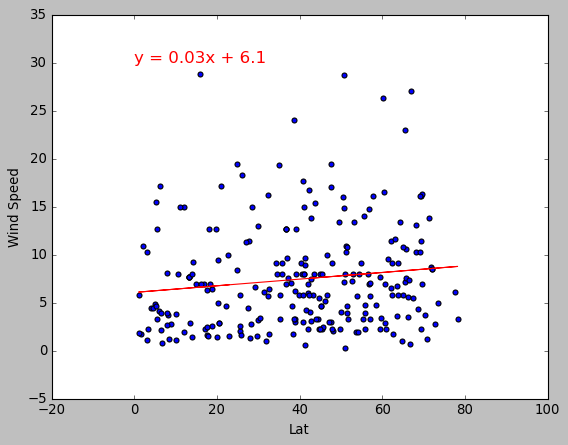

In [141]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,11)

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11199687366283616


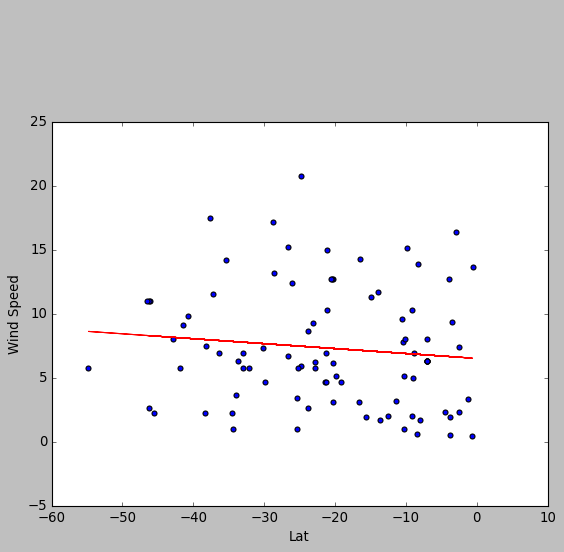

In [142]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,12)

In some cases, temperature correlates with the latitude, but as latitude moves away from the equator, you experience a decrease in temperature. It seems there is no correlation between latitude and humidity or vice versa. Another indicator is, wind speed tends to be higher near the arctic and Antarctica while there is a minimal indication of the correlation between wind speed and latitude.